In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

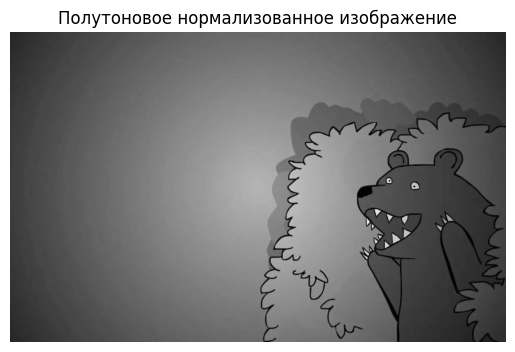

In [3]:
def gray_norm(image_path):
    image = cv2.imread(image_path)
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    norm = cv2.normalize(gray, None, 0, 255, cv2.NORM_MINMAX)
    return norm

image_path = 'img.png'
result = gray_norm(image_path)
plt.imshow(result, cmap='gray')
plt.title('Полутоновое нормализованное изображение')
plt.axis('off')
plt.show()

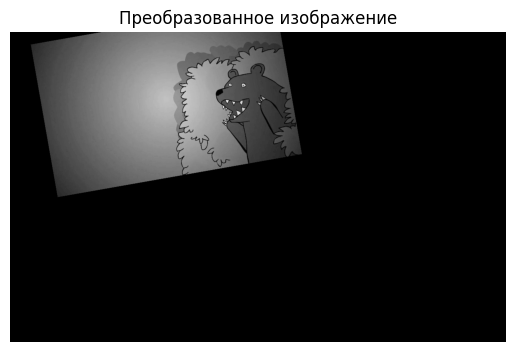

In [6]:
def transform(image, k=1.0, w=0, c=0, f=0):
    rows, cols = image.shape
    w_rad = w
    M = np.array([
        [k * np.cos(w_rad), k * np.sin(w_rad), c],
        [-k * np.sin(w_rad), k * np.cos(w_rad), f]
    ], dtype=np.float32)
    transformed = cv2.warpAffine(image, M, (cols, rows))
    return transformed

scale_factor = 0.5
angle = np.deg2rad(10)
shift_x = 50
shift_y = 30

transformed_image = transform(result, k=scale_factor, w=angle, c=shift_x, f=shift_y)

# Отображение
plt.imshow(transformed_image, cmap='gray')
plt.title('Преобразованное изображение')
plt.axis('off')
plt.show()


In [7]:
def equal(image, num_levels=None):
    if num_levels is None:
        equalized = cv2.equalizeHist(image)
    else:
        quantized = np.floor_divide(image, 256 // num_levels) * (256 // num_levels)
        quantized = quantized.astype(np.uint8)
        equalized = cv2.equalizeHist(quantized)
    
    return equalized

hist_eq_auto = equal(result)
hist_eq_128 = equal(result, num_levels=128)
hist_eq_64 = equal(result, num_levels=64)

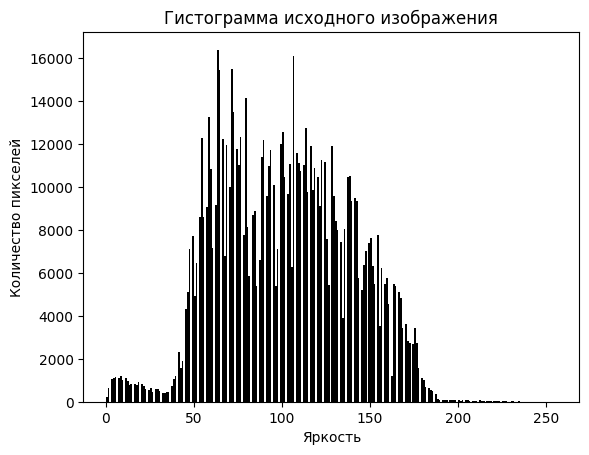

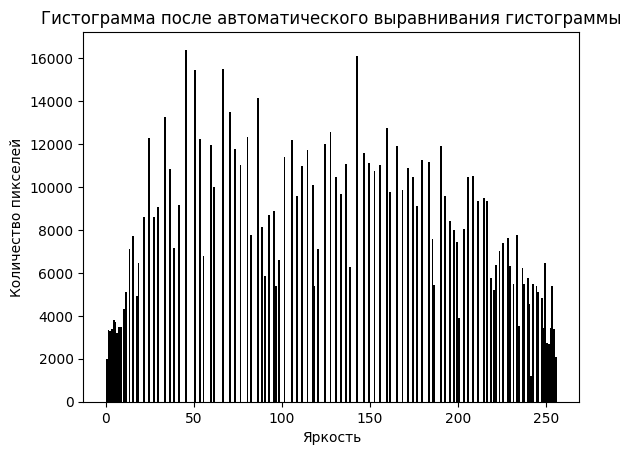

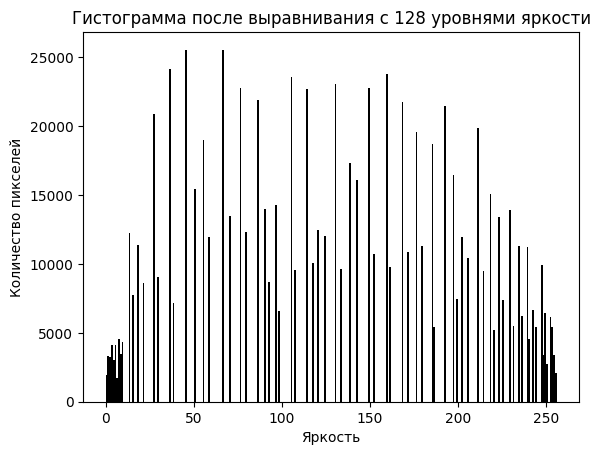

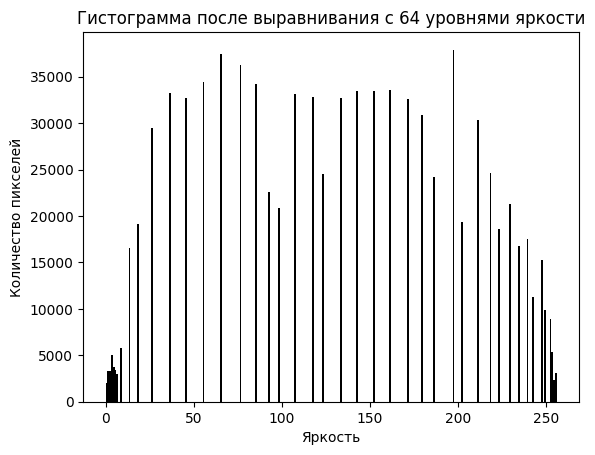

In [10]:
plt.figure()
plt.hist(result.ravel(), bins=256, range=(0, 256), color='black')
plt.title('Гистограмма исходного изображения')
plt.xlabel('Яркость')
plt.ylabel('Количество пикселей')
plt.show()

plt.figure()
plt.hist(hist_eq_auto.ravel(), bins=256, range=(0, 256), color='black')
plt.title('Гистограмма после автоматического выравнивания гистограммы')
plt.xlabel('Яркость')
plt.ylabel('Количество пикселей')
plt.show()

plt.figure()
plt.hist(hist_eq_128.ravel(), bins=256, range=(0, 256), color='black')
plt.title('Гистограмма после выравнивания с 128 уровнями яркости')
plt.xlabel('Яркость')
plt.ylabel('Количество пикселей')
plt.show()

plt.figure()
plt.hist(hist_eq_64.ravel(), bins=256, range=(0, 256), color='black')
plt.title('Гистограмма после выравнивания с 64 уровнями яркости')
plt.xlabel('Яркость')
plt.ylabel('Количество пикселей')
plt.show()

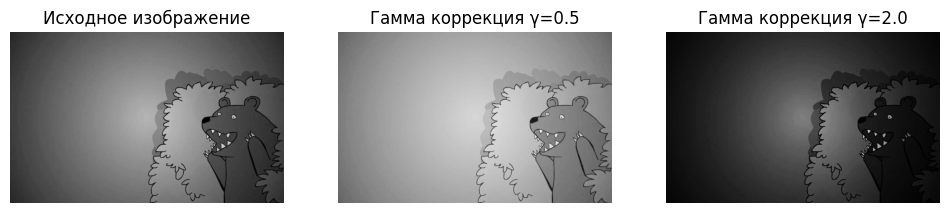

In [14]:
def gamma_cor(image, gamma):
    norm = image / 255.0
    cor = np.power(norm, gamma)
    cor = np.uint8(cor * 255)
    return cor

gamma_l = 0.5
gamma_m = 2.0

gamma_cor_l = gamma_cor(result, gamma_l)
gamma_cor_m = gamma_cor(result, gamma_m)

plt.figure(figsize=(12,6))

plt.subplot(1,3,1)
plt.imshow(result, cmap='gray')
plt.title('Исходное изображение')
plt.axis('off')

plt.subplot(1,3,2)
plt.imshow(gamma_cor_l, cmap='gray')
plt.title(f'Гамма коррекция γ={gamma_l}')
plt.axis('off')

plt.subplot(1,3,3)
plt.imshow(gamma_cor_m, cmap='gray')
plt.title(f'Гамма коррекция γ={gamma_m}')
plt.axis('off')

plt.show()


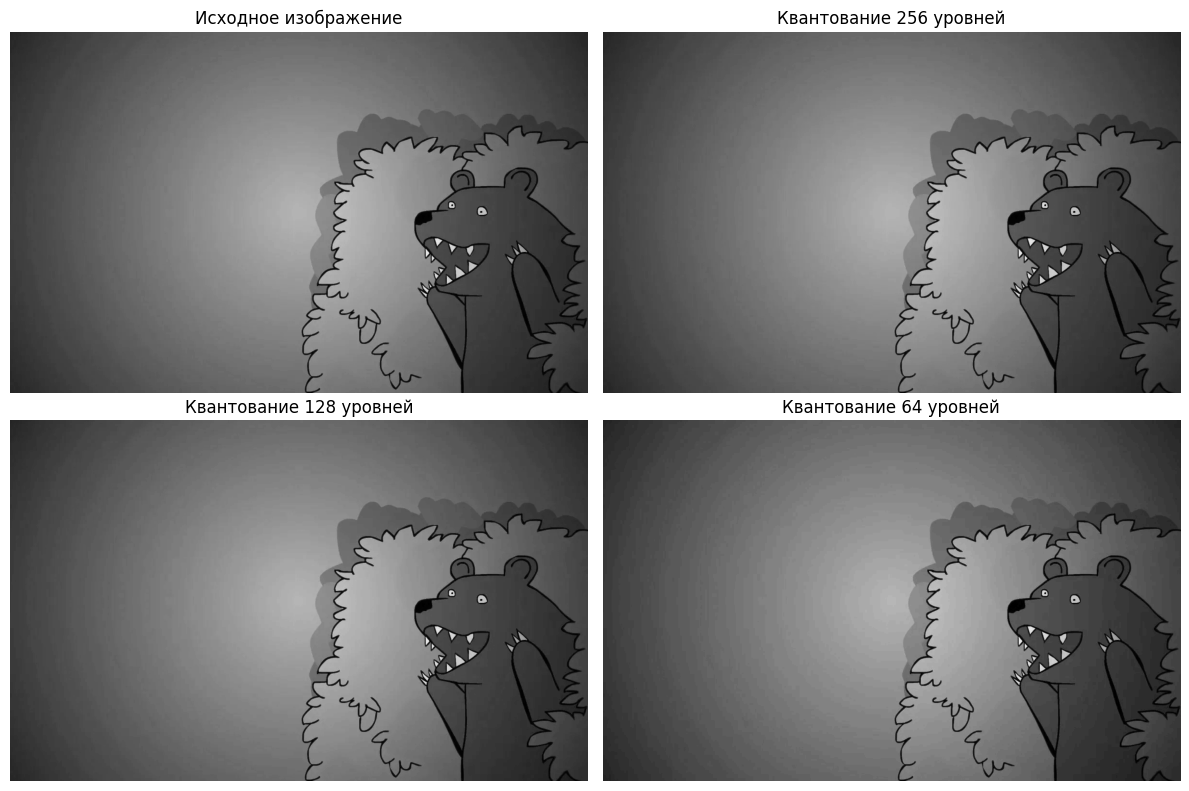

In [18]:
def quantize(image, num_levels):
    step = 256 // num_levels
    quantized = np.floor_divide(image, step) * step
    quantized = np.clip(quantized, 0, 255).astype(np.uint8)
    
    return quantized

quantized_256 = quantize(result, 256)
quantized_128 = quantize(result, 128)
quantized_64 = quantize(result, 64)

plt.figure(figsize=(12,8))

plt.subplot(2,2,1)
plt.imshow(result, cmap='gray')
plt.title('Исходное изображение')
plt.axis('off')

plt.subplot(2,2,2)
plt.imshow(quantized_256, cmap='gray')
plt.title('Квантование 256 уровней')
plt.axis('off')

plt.subplot(2,2,3)
plt.imshow(quantized_128, cmap='gray')
plt.title('Квантование 128 уровней')
plt.axis('off')

plt.subplot(2,2,4)
plt.imshow(quantized_64, cmap='gray')
plt.title('Квантование 64 уровней')
plt.axis('off')

plt.tight_layout()
plt.show()
